In [56]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [57]:
df=pd.read_csv('worldhappiness.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [58]:
df.shape

(158, 12)

In [59]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [60]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [61]:
#here to predict happiness score and happiness rank,region and country not required
df_new=df.drop(["Country","Region","Happiness Rank"],axis=1)
df_new.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [62]:
#checking if there is any null value
df_new.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

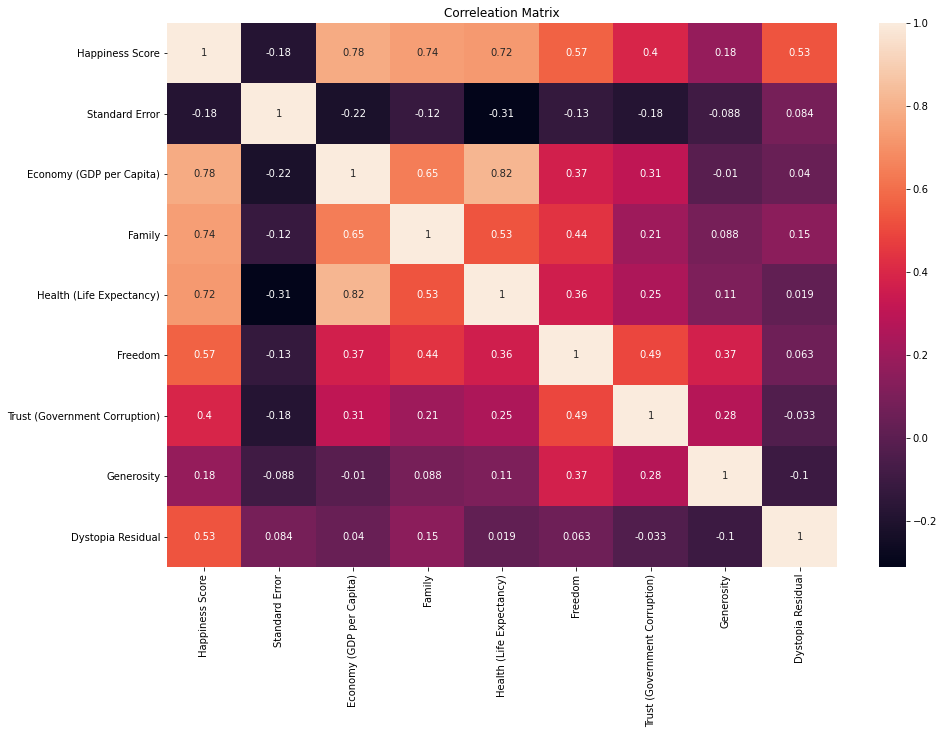

In [63]:
corr_mat=df_new.corr()
plt.figure(figsize=[15,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correleation Matrix")
plt.show()

In [ ]:
sns.pairplot(df_new)

In [ ]:
sns.distplot(df_new["Happiness Score"])

In [ ]:
#splitting the independent and target variable in x & y
x=df_new.drop("Happiness Score",axis=1)
y=df_new["Happiness Score"]

In [ ]:
x.skew()

In [ ]:
#checking outliers 
from scipy.stats import zscore
zscr=np.abs(zscore(x))

threshold=3
print(np.where(zscr>3))

In [ ]:
#removing outliers
df_new1=df_new[(zscr<3).all(axis=1)]

In [ ]:
df_new1.shape

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_states=42)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn_model import LinearRegression
1m=LinearRegression()
1m.fit(x_train,y_train)

In [ ]:
1m.coef_

In [ ]:
1m.intercept

In [ ]:
1m.score(x_train,y_train)

In [ ]:
#predict the value 
pred=1m.predict(x_test)
print("Happiness Score:",pred)
print("Happiness Score:",y_test)

In [ ]:
print('error:')
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_asquared_error(y_test,pred))
print('Root Mean Squared error:',np,sqrt(mean_squared_error(y_test,pred)))

In [ ]:
#r2 score --> coefficent of determination
#is the proportion of the variance in the dependent variable that is predictable from the independent variable
#that is change coming in y whenever x is being used
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

In [ ]:
#predict the happiness score by providing the value
t=np.array([0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176])

In [ ]:
t.shape

In [ ]:
t=t.reshape(1,-1)
t.shape

In [ ]:
1m.predict(t)

In [ ]:
import joblib
joblib.dump(1m,"WorldHappinessReport.obj")